# Importing the important libraries

In [218]:
import kagglehub
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
%matplotlib inline


# Getting the dataset from Kaggle

In [3]:
# Download latest version of the dataset
path = kagglehub.dataset_download("fedesoriano/stroke-prediction-dataset")

# Putting the path to save the data in
custom_path = "./data/"

# Moving the dataset to My custom path
shutil.move(path, custom_path)

# Printing the path of the dataset
print(f"Dataset moved to: {custom_path}")


100%|██████████| 67.4k/67.4k [00:00<00:00, 270kB/s]

Extracting files...
Dataset moved to: ./data/


## Reading the dataset

In [5]:
df = pd.read_csv('./data/1/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

In [7]:
# Let's see the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Let's see the describtion of the dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Seeing the shape of the dataset
print(f'As we can see, the shape is {df.shape}')

As we can see, the shape is (5110, 12)


In [11]:
# Seeing the duplicates in the dataset
print(f'As we can see, the duplicated data is equal to {df.duplicated().sum()}')

As we can see, the duplicated data is equal to 0


In [12]:
# Let's check the null data
print(f'The null data in the dataset is {df.isna().sum()}')

The null data in the dataset is id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


**We can see that, bmi contain around 201 null dataset in it**

In [14]:
# Let's drop the id, as it is not useful to use
df.drop(columns='id', inplace=True)

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Filter only categorical data
categorical_columns = [
    column for column in df.columns 
    if df[column].dtype == 'O' or len(df[column].unique()) < 10
]
# Predefine the color palette
palette = sns.color_palette("Set3")

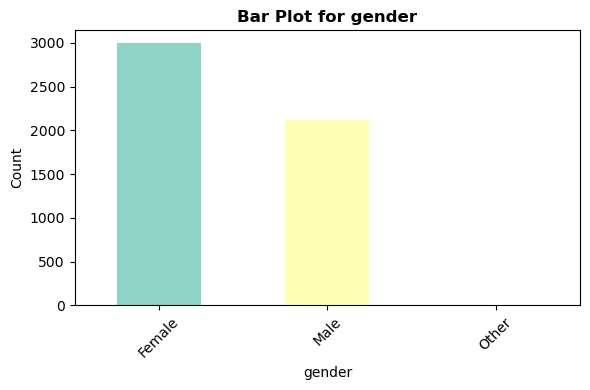

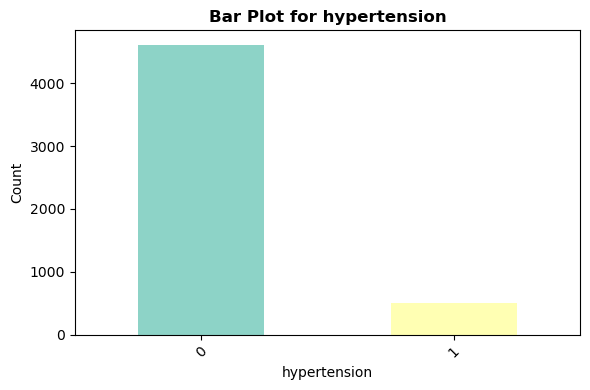

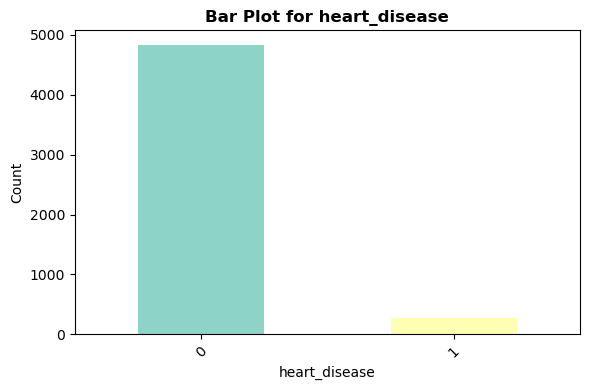

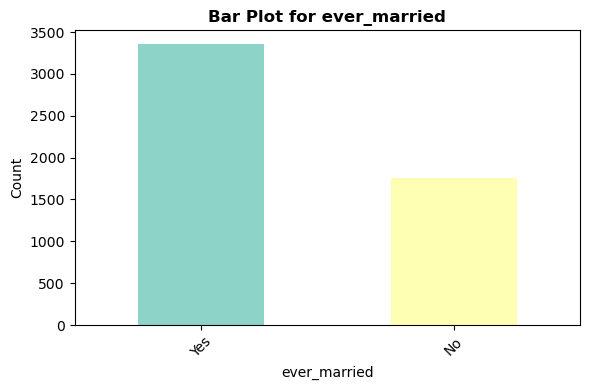

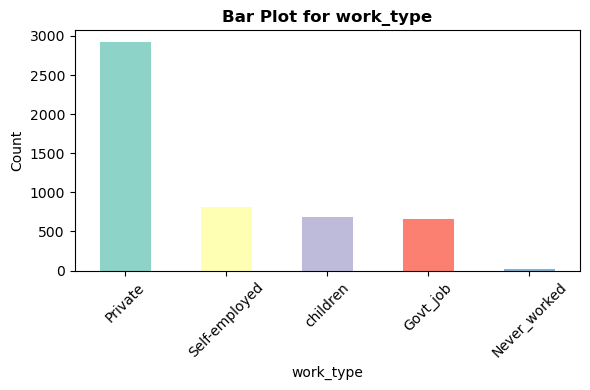

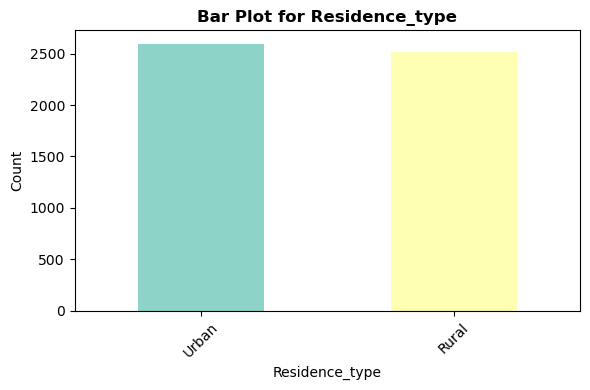

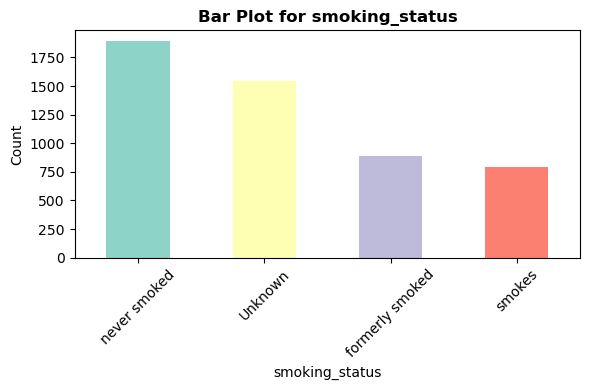

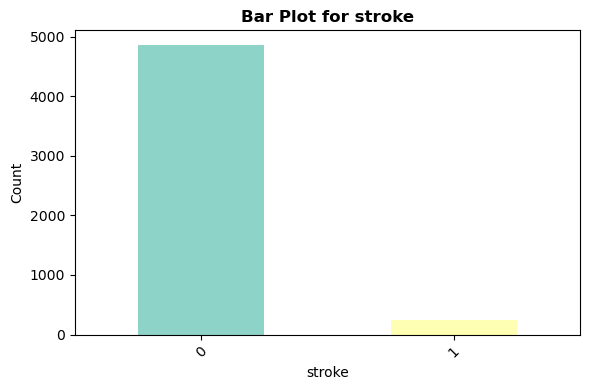

In [17]:
# Loop through categorical columns to create bar plots
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    value_counts = df[column].value_counts()
    # Use a subset of the predefined palette for colors
    colors = palette[:len(value_counts)]
    value_counts.plot(kind='bar', color=colors)
    plt.title(f"Bar Plot for {column}", fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**As we can see, the stroke is containing unbalanced data**

## Data cleaning

In [20]:
# Filling the null data with the mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [33]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Identify columns with object (categorical) data type
object_columns = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

### Splitting the data

In [69]:
X = df.drop(columns='stroke')
y = df.stroke

In [71]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [73]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [75]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [78]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [80]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')

The shape of X_train is (4088, 10)
The shape of X_test is (1022, 10)


### Experiment 1: Train Logistic Regression Classifier

In [85]:
log_reg = LogisticRegression(C=1, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(classification_report(y_test, y_pred_log_reg))


              precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.82      1022



### Experiment 2: Train Random Forest Classifier

In [88]:
rf_clf = RandomForestClassifier(n_estimators=30, max_depth=3, class_weight='balanced')
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79       972
           1       0.11      0.82      0.19        50

    accuracy                           0.66      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.66      0.76      1022



### Experiment 3: Train XGBoost

In [123]:
xgb_clf = XGBClassifier(eval_metric='logloss', max_depth=9, class_weight='balanced')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.21      0.08      0.12        50

    accuracy                           0.94      1022
   macro avg       0.58      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022



C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


### Experiment 4: Handle class imbalance using SMOTETomek and then Train RF

In [128]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [146]:
rf= RandomForestClassifier(n_estimators=30, max_depth=3)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78       972
           1       0.11      0.84      0.19        50

    accuracy                           0.65      1022
   macro avg       0.55      0.74      0.48      1022
weighted avg       0.94      0.65      0.75      1022



## Mlflow

#### Installing mlflow

In [152]:
# pip install mlflow

#### Running mlflow locally

In [ ]:
# !mlflow ui

## Experiment Tracking with MLFlow

In [190]:
models = [
    (
        "LR Normal", 
        {},
        LogisticRegression(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "LR With params", 
        {"C": 1, "solver": 'liblinear'},
        LogisticRegression(C=1, solver='liblinear', class_weight='balanced'), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "RF Normal", 
        {},
        RandomForestClassifier(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "RF With params", 
        {"n_estimators": 30, "max_depth": 3, "class_weight":'balanced'},
        RandomForestClassifier(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "RF With SMOTE", 
        {"n_estimators": 30, "max_depth": 3},
        RandomForestClassifier(), 
        (X_train_res, y_train_res),
        (X_test, y_test)
    ),
    (
        "XGBClassifier normal",
        {},
        XGBClassifier(), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "XGBClassifier With params",
         {"eval_metric": 'logloss', "n_estimators": 30, "class_weight":'balanced'},
        XGBClassifier(eval_metric='logloss', class_weight='balanced'), 
        (X_train, y_train),
        (X_test, y_test)
    ),
    (
        "XGBClassifier With SMOTE",
        {"n_estimators": 30, "eval_metric": 'logloss'},
        XGBClassifier(eval_metric='logloss'), 
        (X_train_res, y_train_res),
        (X_test, y_test)
    )
]

In [194]:
reports = []

for model_name, params, model, train_set, test_set in models:
    X_train = train_set[0]
    y_train = train_set[1]
    X_test = test_set[0]
    y_test = test_set[1]

    print(f'Model name: {model_name}')
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(report)
    print(f'#################################\n')
    reports.append(report)

Model name: LR Normal
{'0': {'precision': 0.9528949950932286, 'recall': 0.9989711934156379, 'f1-score': 0.9753892516323456, 'support': 972.0}, '1': {'precision': 0.6666666666666666, 'recall': 0.04, 'f1-score': 0.07547169811320754, 'support': 50.0}, 'accuracy': 0.952054794520548, 'macro avg': {'precision': 0.8097808308799477, 'recall': 0.5194855967078189, 'f1-score': 0.5254304748727766, 'support': 1022.0}, 'weighted avg': {'precision': 0.9388916522152168, 'recall': 0.952054794520548, 'f1-score': 0.9313619740629161, 'support': 1022.0}}
#################################

Model name: LR With params
{'0': {'precision': 0.9863201094391245, 'recall': 0.7417695473251029, 'f1-score': 0.8467410452143277, 'support': 972.0}, '1': {'precision': 0.13745704467353953, 'recall': 0.8, 'f1-score': 0.23460410557184752, 'support': 50.0}, 'accuracy': 0.7446183953033269, 'macro avg': {'precision': 0.561888577056332, 'recall': 0.7708847736625515, 'f1-score': 0.5406725753930877, 'support': 1022.0}, 'weighted a

C:\Users\habob\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'0': {'precision': 0.9518664047151277, 'recall': 0.9969135802469136, 'f1-score': 0.9738693467336683, 'support': 972.0}, '1': {'precision': 0.25, 'recall': 0.02, 'f1-score': 0.037037037037037035, 'support': 50.0}, 'accuracy': 0.949119373776908, 'macro avg': {'precision': 0.6009332023575639, 'recall': 0.5084567901234568, 'f1-score': 0.5054531918853526, 'support': 1022.0}, 'weighted avg': {'precision': 0.9175285179873818, 'recall': 0.949119373776908, 'f1-score': 0.9280360634804085, 'support': 1022.0}}
#################################

Model name: RF With params
{'0': {'precision': 0.9877112135176651, 'recall': 0.661522633744856, 'f1-score': 0.7923598274799754, 'support': 972.0}, '1': {'precision': 0.11320754716981132, 'recall': 0.84, 'f1-score': 0.1995249406175772, 'support': 50.0}, 'accuracy': 0.6702544031311155, 'macro avg': {'precision': 0.5504593803437382, 'recall': 0.750761316872428, 'f1-score': 0.4959423840487763, 'support': 1022.0}, 'weighted avg': {'precision': 0.944927276807887

C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


{'0': {'precision': 0.9624724061810155, 'recall': 0.897119341563786, 'f1-score': 0.9286474973375932, 'support': 972.0}, '1': {'precision': 0.13793103448275862, 'recall': 0.32, 'f1-score': 0.1927710843373494, 'support': 50.0}, 'accuracy': 0.8688845401174168, 'macro avg': {'precision': 0.5502017203318871, 'recall': 0.608559670781893, 'f1-score': 0.5607092908374713, 'support': 1022.0}, 'weighted avg': {'precision': 0.9221328087398092, 'recall': 0.8688845401174168, 'f1-score': 0.8926457158796556, 'support': 1022.0}}
#################################



In [203]:
# Initialize MLflow
mlflow.set_experiment("Models Detection")
mlflow.set_tracking_uri(" http://127.0.0.1:5000")

for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = reports[i]
    
    with mlflow.start_run(run_name=model_name):        
        mlflow.log_params(params)
        mlflow.log_metrics({
            'accuracy': report['accuracy'],
            'precision_class_1': report['1']['precision'],
            'precision_class_0': report['0']['precision'],
            'recall_class_1': report['1']['recall'],
            'recall_class_0': report['0']['recall'],
            'f1_score_class_1': report['1']['f1-score'],
            'f1_score_class_0': report['0']['f1-score'],
            'f1_score_macro': report['macro avg']['f1-score']
        })  
        
        if "XGB" in model_name:
            mlflow.xgboost.log_model(model, "model")
        else:
            mlflow.sklearn.log_model(model, "model") 

2024/12/30 18:38:16 INFO mlflow.tracking.fluent: Experiment with name 'Models Detection' does not exist. Creating a new experiment.
2024/12/30 18:38:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR Normal at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/40393aff16ad452bad680ce5f1000fa8
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


2024/12/30 18:38:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LR With params at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/537a204f3ac847afbf34cfd94e0a5a87
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


2024/12/30 18:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF Normal at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/6b0de39a3a324800945b964e87a98c18
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


2024/12/30 18:38:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF With params at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/194c1c232a874586a5b1a9e0d002fed4
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


2024/12/30 18:38:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF With SMOTE at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/dc8d5eca618847bcba6798d789c75342
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:38:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/12/30 18:38:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier normal at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/967c1de59ffb45bb8274978186977088
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:38:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/12/30 18:38:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier With params at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/b67eb27c85cd4defb96d4cb52c899c84
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


C:\Users\habob\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:38:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/12/30 18:39:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier With SMOTE at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/e4021bada82e4a70bd7822a68984e04a
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423


### Registering the Model

In [214]:
model_name = 'RF With SMOTE'  
run_id = input('Please type RunID: ')  

# Form the model URI from the run ID
model_uri = f'runs:/{run_id}/model' 

# Register the model
with mlflow.start_run(run_id=run_id):
    mlflow.register_model(model_uri=model_uri, name=model_name)

print(f"Model registered with name: {model_name} and run ID: {run_id}")


Please type RunID:  dc8d5eca618847bcba6798d789c75342


Registered model 'RF With SMOTE' already exists. Creating a new version of this model...
2024/12/30 18:56:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RF With SMOTE, version 2


🏃 View run RF With SMOTE at:  http://127.0.0.1:5000/#/experiments/840293546516260423/runs/dc8d5eca618847bcba6798d789c75342
🧪 View experiment at:  http://127.0.0.1:5000/#/experiments/840293546516260423
Model registered with name: RF With SMOTE and run ID: dc8d5eca618847bcba6798d789c75342


Created version '2' of model 'RF With SMOTE'.


### Load the Model

In [244]:
# After registration, use the model name and version to load the model
model_version = 1 

# model_uri = f"models:/{model_name}/{model_version}"
model_uri = f"models:/{model_name}/{model_version}"

# Load the registered model
loaded_model = mlflow.sklearn.load_model(model_uri)

# Make predictions
y_pred = loaded_model.predict(X_test)

# Display the first 4 predictions
print("First 4 predictions:", y_pred[:4])

First 4 predictions: [1 0 0 0]


In [246]:
# Get predicted probabilities
y_pred_proba = loaded_model.predict_proba(X_test)

# Show the first 4 probabilities (for class 1)
print("First 4 probabilities for class 1:", y_pred_proba[:4, 1])



First 4 probabilities for class 1: [0.62488247 0.15982432 0.15326321 0.23968477]


### Model Production

In [250]:
current_model_uri = f"models:/{model_name}@challenger"
production_model_name = "model-detection-prod"

client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=current_model_uri, dst_name=production_model_name)

Successfully registered model 'model-detection-prod'.
Copied version '1' of model 'RF With SMOTE' to version '1' of model 'model-detection-prod'.


<ModelVersion: aliases=[], creation_timestamp=1735574969287, current_stage='None', description=('This model is trained with Random forest model with smote as the data is not '
 'balanced'), last_updated_timestamp=1735574969287, name='model-detection-prod', run_id='dc8d5eca618847bcba6798d789c75342', run_link='', source='models:/RF With SMOTE/1', status='READY', status_message='', tags={}, user_id='', version='1'>